<a href="https://colab.research.google.com/github/LazaroR-u/QubitxQubit/blob/main/QxQ_YLC_Week_4_Lab_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Python Review Double Slit Experiment Simulator**
---

### **Description**
In today's lab, you will review variables, functions, and objects. Then, you will use these skills to explore a simulator of the double slit experiment.

<br>

### **Lab Structure**
**Part 1**: [Review](#p1)

**Part 2**: [Using the Double Slit Experiment Simulator](#p2)

**Part 3**: [Modifying the Double Slit Experiment Simulator](#p3)

**Part 4**: [Additional Practice Problems](#p4)

<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how different components of the double slit experiment affect the interference pattern.
* Understand how to modify attributes of the `doubleSlit` object to recreate interference patterns.


<br>

### **Resources**
* [Double Slit Simulator Documentation](https://drive.google.com/file/d/1iP6t6RAFF-14IAzj8rwuLU_OzqjA7vMs/view?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("Libraries imported successfully!")

Libraries imported successfully!


<a name="p1"></a>

---
## **Part 1: Python Review**
---
In this part, you will practice python skills involving variables, functions, and debugging.

####**Problem #1.1**

**Together**, write code that says `"Welcome to Lab 4!"`.

In [ ]:
# COMPLETE THIS CODE

####**Problem #1.2**

**Together** create a variable for your favorite animal. Then, using that variable, print `"My favorite animal is the 'animal'"`.

In [ ]:
# COMPLETE THIS CODE

####**Problem #1.3**

**Together,** debug the code shown below.

In [ ]:
groceries = apples, pears, and bananas
"I need to buy"

SyntaxError: ignored

In [ ]:
groceries

####**Problem #1.4**

**Independently**, debug the code shown below.

In [ ]:
height = 10
base = 5
area = .5*base*height
"The area is" area

SyntaxError: ignored

####**Problem #1.5**
**Independently**, assign numerical values to the variables below. Then write code to calculate the area of a triangle using your variables. Finally print the area.

In [ ]:
base = # COMPLETE THIS CODE
height = # COMPLETE THIS CODE
area_triangle = # COMPLETE THIS CODE

####**Problem #1.6**
**Independently**, write code that finds the area of a square with the same side length as the base of your triangle. Print the area of the square.

In [ ]:
side = # COMPLETE THIS CODE
area_square = # COMPLETE THIS CODE

####**Problem #1.7 [ADVANCED]**
**Independently**, use the max function to see which area is larger.

In [ ]:
max( # COMPLETE THIS CODE

####**Problem #1.8 [ADVANCED]**
**Independently**, use the min function to see which area is smaller.

In [ ]:
min(# COMPLETE THIS CODE

####**Problem #1.9 [ADVANCED]**

**Independently**, use the `input` function to input your age, then use the `print` function to print `"I am [age] years old."`.

In [ ]:
age = # COMPLETE THIS CODE

####**Problem #1.10 [ADVANCED]**
**Independently**, use the `max` function to find which of the below variables has the greatest value.

In [ ]:
a = 8
b = 9
c = 6

# COMPLETE THIS CODE

---

<center>

### **Wait for Your Instructor to Continue**

---

<a name="p2"></a>

---
## **Part 2: Using the Double Slit Experiment Simulator**
---
In this part, you will learn how to use the double slit experiment simulator.

#### **Problem #2.1**
**Together**, create a `doubleSlit` object using its associated function. All of its arguments are optional, so you do not need to put anything in the parentheses yet.


In [4]:
my_experiment =  doubleSlit() # COMPLETE THIS CODE

#### **Problem #2.2**
**Together,** use the appropriate method of the `doubleSlit` object to display the screen.

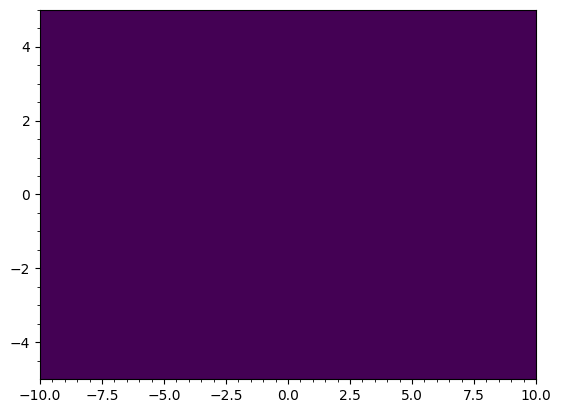

In [6]:
my_experiment.show_screen() # COMPLETE THIS CODE

#### **Problem #2.3**
**Together,** use the appropriate method of the `doubleSlit` object to fire a single electron at the screen. Then, display the screen again.

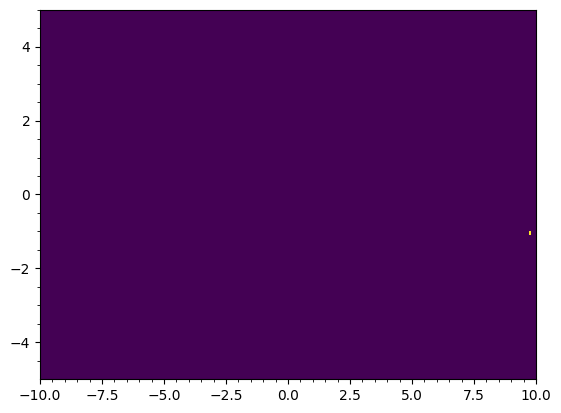

In [7]:
my_experiment.fire_electron()
my_experiment.show_screen() # COMPLETE THIS CODE

#### **Problem #2.4**

**Together**, create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire an electron and display the screen.

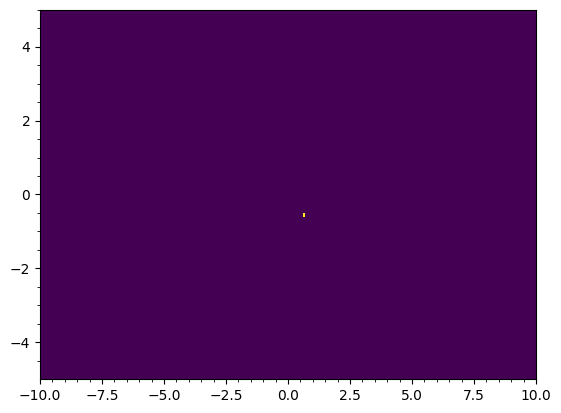

In [13]:
double_slit = doubleSlit(measure_slit=True)

# Fire an electron
double_slit.fire_electron()

# Display the screen
double_slit.show_screen()

####**Problem #2.5**
**Together,** use the appropriate method to fire 500 electrons at the screen. Then, display the screen.

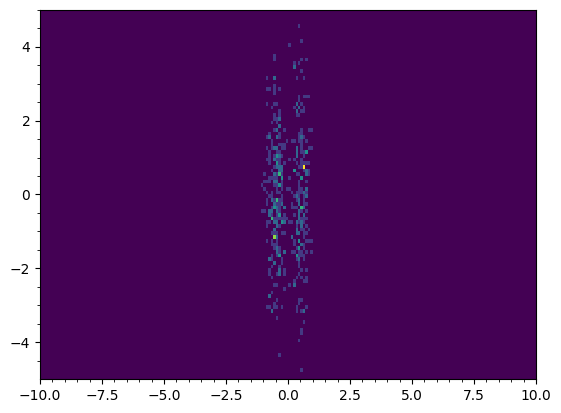

In [14]:
i=0
while i<500:
  double_slit.fire_electron()
  i=i+1
double_slit.show_screen() # COMPLETE THIS CODE

#### **Problem #2.6**
**Independently,** use the appropriate method to fire 10,000 electrons at the screen. Then, display the screen.

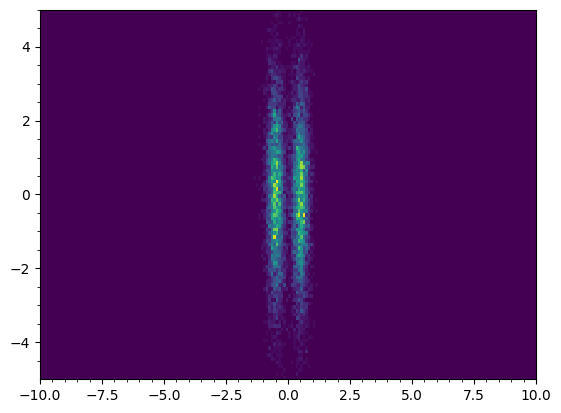

In [15]:
i=0
while i<10000:
  double_slit.fire_electron()
  i=i+1
double_slit.show_screen() # COMPLETE THIS CODE
# COMPLETE THIS CODE

#### **Problem #2.7**
**Independently,** create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire 10000 electrons and display the screen.

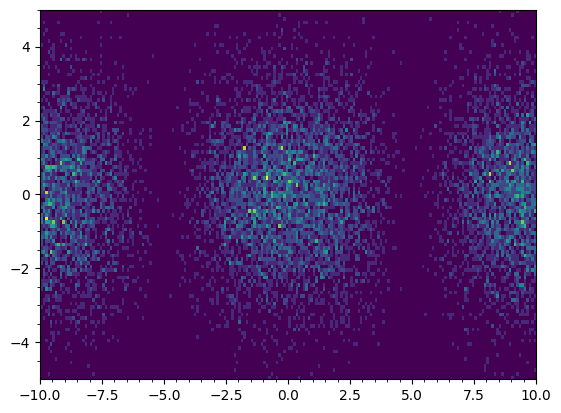

In [12]:
# COMPLETE THIS CODE
my_experiment3 = doubleSlit()



---

<center>

### **Wait for Your Instructor to Continue**

---

<a name="p3"></a>

---
## **Part 3: Modifying the Double Slit Experiment Simulator**
---
In this part, you will see how certain modifications to the `doubleSlit` object affect the interference pattern shown on the screen.

#### **Problem #3.1**
**Together,** debug the code below.

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

ValueError: ignored

#### **Problem #3.2**
**Together,** create a `doubleSlit` object that starts with a slit distance of 3.

In [16]:
my_experiment.distance_to_screen # COMPLETE THIS CODE

10

####**Problem #3.3**

**Independently**, create a `doubleSlit` object with a slit distance of 6, and fire an electron beam of 10,000 electrons. How do you expect this to compare to the slit distance of 3?

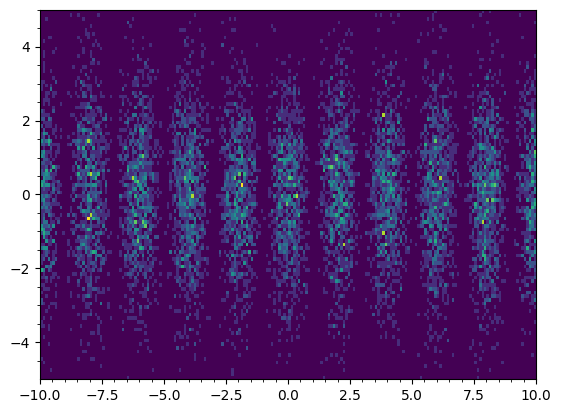

In [18]:
my_experiment33= doubleSlit(slit_dist = 5)
my_experiment33.electron_beam(num_electrons=10000)
my_experiment33.show_screen()
 # COMPLETE THIS CODE

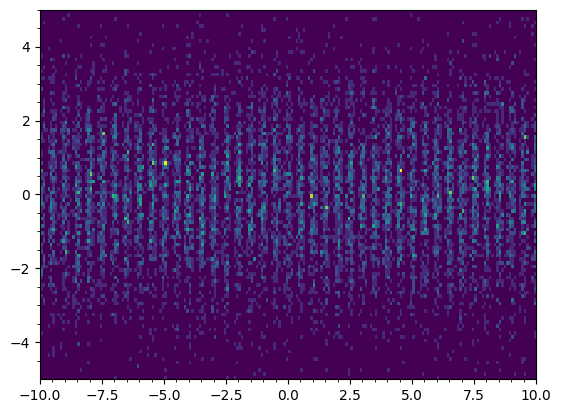

In [19]:
my_experiment33= doubleSlit(slit_dist = 20)
my_experiment33.electron_beam(num_electrons=10000)
my_experiment33.show_screen()

In [20]:
my_experiment33.distance_to_screen

10

####**Problem #3.4**

**Independently**, create a `doubleSlit` object with a slit distance of 50, and fire an electron beam of 10,000 electrons.

In [ ]:
# COMPLETE THIS CODE

#### **Problem #3.5**
**Independently**, explore how changing the distance between the slits changes the interference patters. For what range of slit distances do you see an interference pattern? Print the range that you find. **Note:** Do not measure the slit.


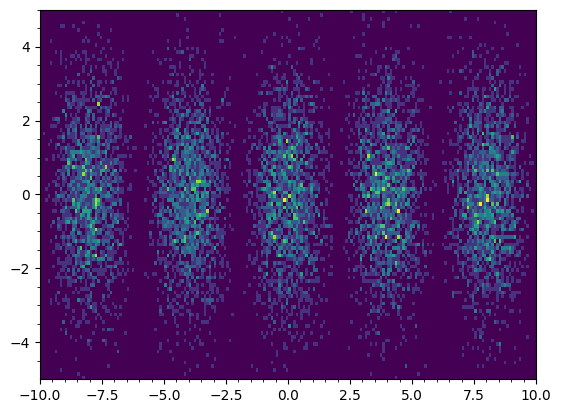

In [22]:
my_experiment33= doubleSlit(distance_to_screen= 20, slit_dist= 5)
my_experiment33.electron_beam(num_electrons=10000)
my_experiment33.show_screen()
# COMPLETE THIS CODE

#### **Problem #3.6**
**Independently,** modify the code from Problem #3.6 to find the distances between bright spots for the following distances between the slit and the screen:
*  1
*  1.5
*  2
*  2.5
*  5
*  10

Keep the slit distance at its default value of 1. Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
# COMPLETE THIS CODE

#### **Problem #3.7**
The plot shown below was generated with a `distance_to_screen` of 20. What `slit_dist` was used?

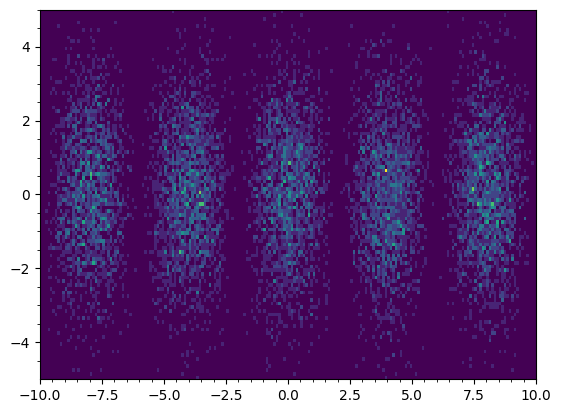

In [ ]:
# COMPLETE THIS CODE

#### **Problem #3.8 [ADVANCED]**
**Independently,** search through the documentation to find a way to create a histogram of the x coordinates of the detections. Then, create a `doubleSlit` object with a `slit_dist` of 3, fire 5,000 electrons at the screen, the display a histogram of the detections. Print the distance between the bright spots on the screen.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#### **Problem #3.9 [ADVANCED]**
**Independently,** modify the code from problem #3.6 to find the distances between bright spots for the following slit distances:
*  1
*  1.5
*  2
*  5
*  10
*  20

Record your results in the list `bright_spot_distances`, then run the code below to produce a line graph.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
slit_distances = [1,1.5,2,5,10,20]
bright_spot_distances = [] #COMPLETE THIS LIST

plt.plot(slit_distances,bright_spot_distances)
plt.xlabel("Distance Between Slits")
plt.ylabel("Distance Between Bright Spots in Interference Pattern")

<a name="p4"></a>

---
##**Part 4: Additional Practice Problems**
---
This part contains optional practice problems to improve your python skills.

####**Problem #4.1**

**Independently**, use the `print` function to print the phrase "My favorite food is" followed by your favorite food.

In [ ]:
# COMPLETE THIS CODE

####**Problem #4.2**
**Independently**, print the third entry of the list below.

In [ ]:
my_list = [3,1,4,1,5]
# COMPLETE THIS CODE

####**Problem #4.3**
**Independently**, use the `input` function to create an imput that reads "Enter Password". Then create a `print` function that says "Password:". Enter the password "Quantum123".

In [ ]:
# COMPLETE THIS CODE

####**Problem #4.4**
**Independently**, write code that will find the smallest value in the below list.

In [ ]:
my_list = [.01, .001, .006, .014]
# COMPLETE THIS CODE

####**Problem #4.5**
**Independently**, create one variable of an animal and one variable of a place that you would see the animal. Then use the `print` function to print "I saw the [animal] in the [place].".

In [ ]:
# COMPLETE THIS CODE

####**Problem #4.6**
**Independently**, fill out the complete the variables below and run the code to create a "Mad Lib".

In [ ]:
place = # COMPLETE THIS CODE
animal = # COMPLETE THIS CODE
verb_ending_in_ing = # COMPLETE THIS CODE
noun = # COMPLETE THIS CODE
color = # COMPLETE THIS CODE
print("Today I went to the " + place + " and I saw a " + animal + ". The " + animal + " was " + verb_ending_in_ing + ". I tried to take a picture, but before I could, I dropped my " + noun + ". I got so embarrassed that I turned " + color + ".")

####**Problem #4.7**
**Independently**, debug the code shown below.

In [ ]:
my_list = ["1", 2, "3", "4"]
min(my_list)

TypeError: ignored

####**Problem #4.8**
**Independently**, debug the code shown below.

In [ ]:
course = "science"
print("My favorite class is " course "!")

SyntaxError: ignored

####**Problem #4.9**
**Independently**, debug the code shown below.

In [ ]:
my_list = ["pie", 3.14, "cake"]
print(my_list[3])

IndexError: ignored

####**Problem #4.10**
**Independently**, create a `doubleSlit` object with a slit distance of 5. Then use the appropriate method of the `doubleSlit` object to fire two electrons at the screen. Then, display the screen.

In [ ]:
my_experiment = #COMPLETE THIS CODE

#End of notebook
---
© 2023 The Coding School, All rights reserved